**Description:** The project focuses on developing and evaluating dynamic pricing models for retail. It compares traditional statistical methods like ARIMA with ensemble learning techniques, such as Random Forests. 

**Research Problem:** Traditional models often struggle with complex data patterns and large datasets. The problem is to determine whether advanced ensemble learning techniques can outperform traditional time-series models in predicting optimal prices.

### Strategies for Dynamic Pricing:
1. **Rule-Based Pricing:** Setting prices based on predefined rules like competitor prices, stock levels, or markdown schedules. Works well as a baseline for both model types.
2. **Demand Forecasting:** Predicting future demand to adjust prices dynamically, commonly used in time-series models.
3. **Elasticity-Based Pricing:** Adjusting prices based on the estimated price elasticity of demand, often implemented using ensemble models for non-linear relationships.
4. **Optimization-Based Pricing:** Using optimization algorithms to maximize revenue or profit by integrating model predictions with constraints like inventory and competitor prices.
5. **Context-Aware Pricing:** Leveraging additional factors like seasonality, promotions, or customer behavior, often better captured by ensemble models due to their feature flexibility.

### Differences in Strategies:
1. **Time-Series Models:** Focus on temporal patterns and demand forecasting, relying heavily on historical sales and seasonality trends.
2. **Ensemble Models:** Incorporate broader feature sets (e.g., competitor prices, customer ratings) and excel in capturing complex, non-linear relationships, making them suitable for context-aware and elasticity-based pricing.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv("Datasets/retail_store_inventory.csv")

In [16]:
dataset.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Exploratory Data Analysis

In [17]:
dataset.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [18]:
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [19]:
dataset.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

##### What is the overall distribution of prices?
(Understanding price distribution helps identify common price ranges and outliers.)

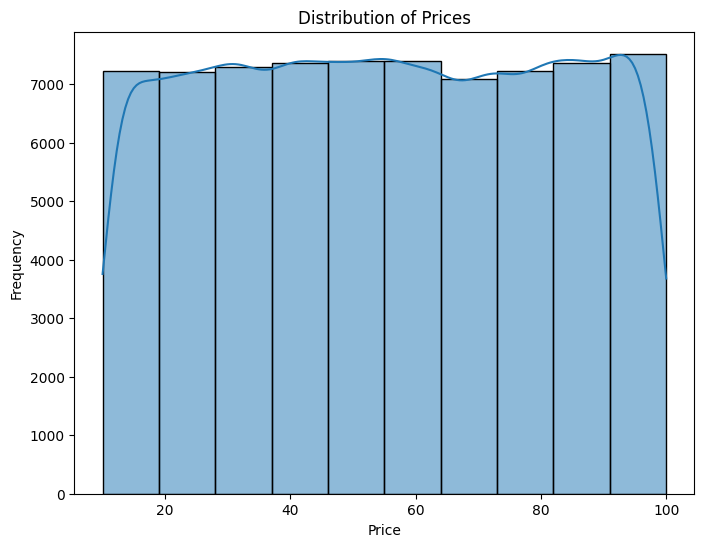

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Price'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> The prices in the dataset are relatively uniformly distributed. This means there's no single price range that dominates the dataset; prices are spread out evenly across the entire range.  

(Prices are uniformly distributed, we might want to explore dynamic pricing strategies that consider contextual factors like demand, inventory levels, or competitor pricing to find opportunities for optimizing prices.)

##### How do sales volumes vary across different price points?
(This reveals the demand elasticity and how price changes affect sales.)

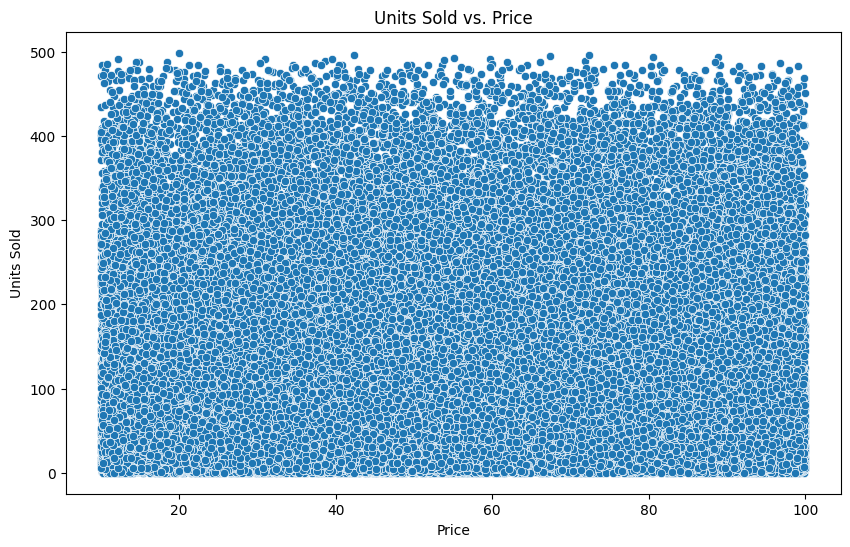

In [31]:
# Plotting Units Sold against Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Price', y='Units Sold')
plt.title('Units Sold vs. Price')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

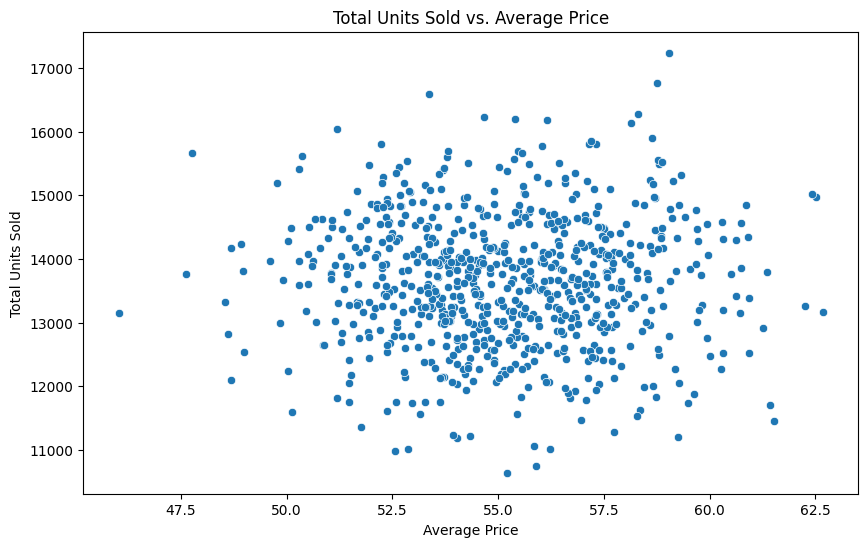

In [32]:
# Grouping by date to get total units sold and average price
daily_sales = dataset.groupby('Date').agg({'Units Sold': 'sum', 'Price': 'mean'}).reset_index()

# Plotting Total Units Sold vs. Average Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_sales, x='Price', y='Units Sold')
plt.title('Total Units Sold vs. Average Price')
plt.xlabel('Average Price')
plt.ylabel('Total Units Sold')
plt.show()

> The relationship between price and sales might not be linear or direct. It might involve more complex interactions with other variables like seasonality, inventory levels, or promotions.

##### What are the monthly trends in sales and prices?
(Identifies the impact of monthly on pricing and demand.)

In [33]:
# Convert the 'Date' column to datetime format.
dataset['Date'] = pd.to_datetime(dataset['Date'])  # Ensure 'Date' is in datetime format
dataset['Month'] = dataset['Date'].dt.month  # Extract month for seasonal analysis

In [37]:
# Group by month to get average sales and prices
# Group the dataset by month to calculate the average sales and prices for each month.
monthly_sales = dataset.groupby('Month')['Units Sold'].mean().reset_index()
monthly_prices = dataset.groupby('Month')['Price'].mean().reset_index()

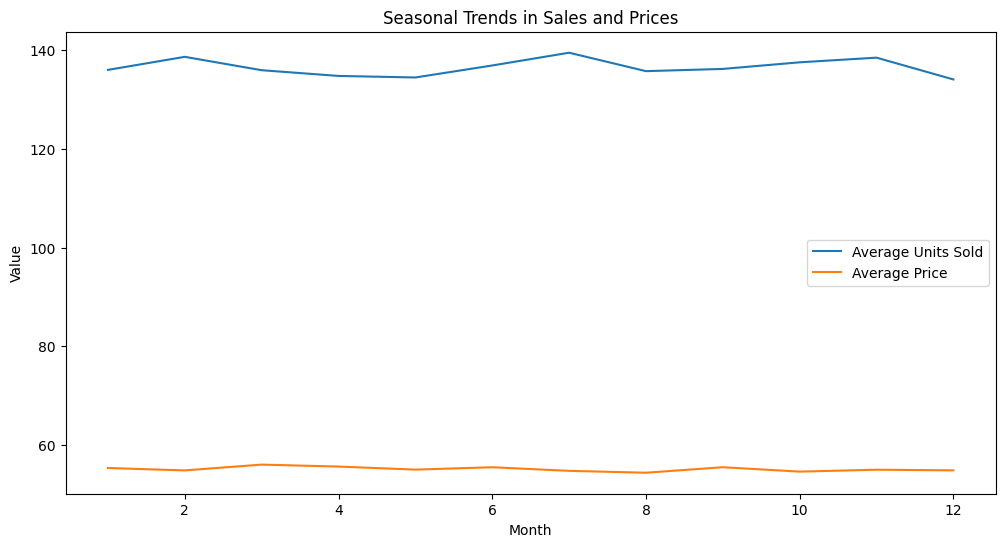

In [38]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', ax=ax1, label='Average Units Sold')
sns.lineplot(data=monthly_prices, x='Month', y='Price', ax=ax1, label='Average Price')
ax1.set_xlabel('Month')
ax1.set_ylabel('Value')
ax1.set_title('Seasonal Trends in Sales and Prices')
plt.legend()
plt.show()


> The almost horizontal line for average price indicates that prices remain relatively stable throughout the year.  
> The tops in the sales line suggest that there are specific periods when sales peak, likely influenced by factors like promotions, holidays, or seasonal demand.

##### What are the seasonal trends in sales and prices?
(Identifies the impact of seasonality on pricing and demand.)

In [39]:
# Group by 'Seasonality' to get average sales and prices
seasonal_sales = dataset.groupby('Seasonality')['Units Sold'].mean().reset_index()
seasonal_prices = dataset.groupby('Seasonality')['Price'].mean().reset_index()

# Merging sales and prices for easier plotting
seasonal_trends = pd.merge(seasonal_sales, seasonal_prices, on='Seasonality')

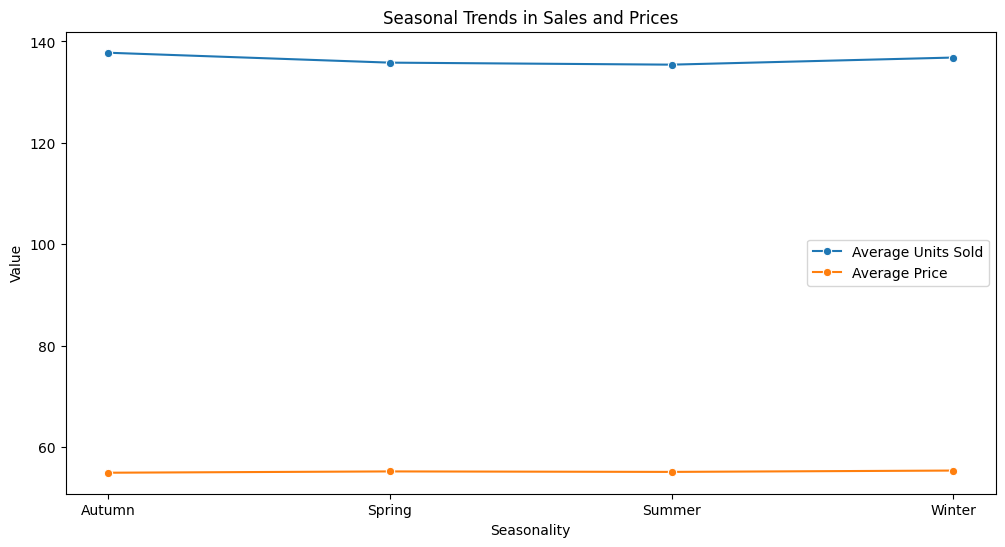

In [40]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Seasonality', y='Units Sold', marker='o', ax=ax1, label='Average Units Sold')
sns.lineplot(data=seasonal_trends, x='Seasonality', y='Price', marker='o', ax=ax1, label='Average Price')
ax1.set_xlabel('Seasonality')
ax1.set_ylabel('Value')
ax1.set_title('Seasonal Trends in Sales and Prices')
plt.legend()
plt.show()

> Average units sold decreases in spring and summer and increases in autumn and winter.

##### How do prices vary across different product categories?
(Different categories may have different optimal pricing strategies.)

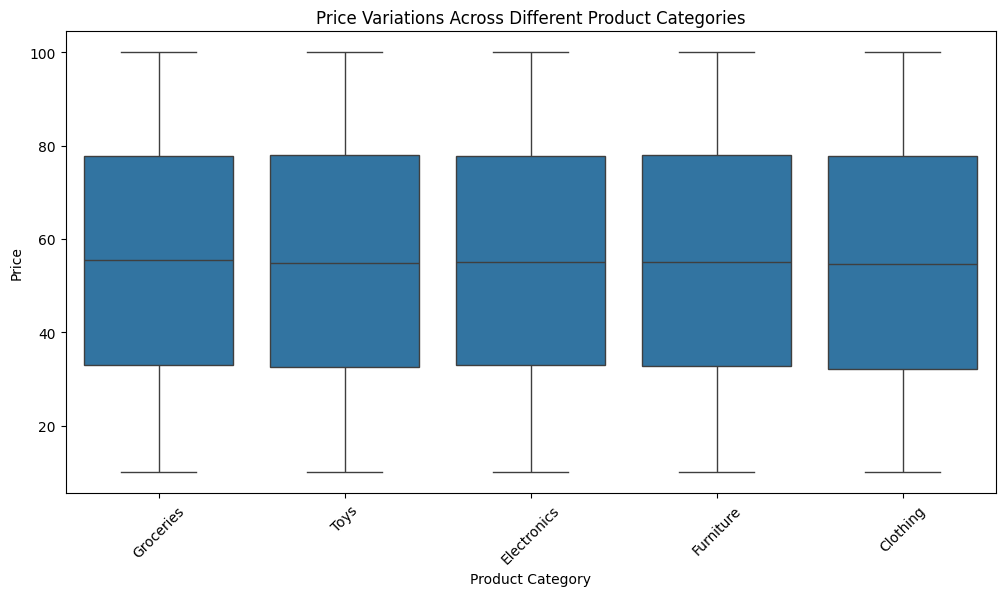

In [ ]:
# Create a boxplot to visualize price variations across different product categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=dataset) # Seaborn’s boxplot function handles the grouping internally, so you don’t need to perform any additional grouping steps manually,
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Variations Across Different Product Categories')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

> The boxplots are identical it, suggests that there is little to no variation in pricing across the different product categories.   
> If the dataset is accurate, it indicates that the pricing strategy for different categories is highly uniform, and there’s little need for category-specific pricing strategies.

In [43]:
# Inspect a sample of the dataset for different categories
sample_data = dataset.groupby('Category').head(5)  # Get first 5 entries for each category
print(sample_data[['Category', 'Price']])


       Category  Price
0     Groceries  33.50
1          Toys  63.01
2          Toys  27.99
3          Toys  32.72
4   Electronics  73.64
5     Groceries  76.83
6     Furniture  34.16
7      Clothing  97.99
8   Electronics  20.74
9          Toys  59.99
10    Furniture  58.53
11     Clothing  58.25
12         Toys  43.60
13     Clothing  78.11
14     Clothing  92.99
15  Electronics  21.90
17     Clothing  19.57
20    Groceries  32.80
22    Furniture  20.46
25    Furniture  85.59
26    Groceries  91.13
27  Electronics  66.96
29  Electronics  60.84
30    Groceries  34.62
52    Furniture  73.98


##### What are the regional variations in pricing and sales?
(Pricing may need to be adjusted based on regional demand and competition.)

In [46]:
# Group by 'Region' and calculate the average price and average units sold
regional_prices = dataset.groupby('Region')['Price'].mean().reset_index()
regional_sales = dataset.groupby('Region')['Units Sold'].mean().reset_index()

In [49]:
regional_prices.head()

,Region,Price
0,East,55.184385
1,North,55.315522
2,South,55.043126
3,West,54.997406


In [50]:
regional_sales.head()

,Region,Units Sold
0,East,136.861137
1,North,136.326860
2,South,137.060666
3,West,135.605838


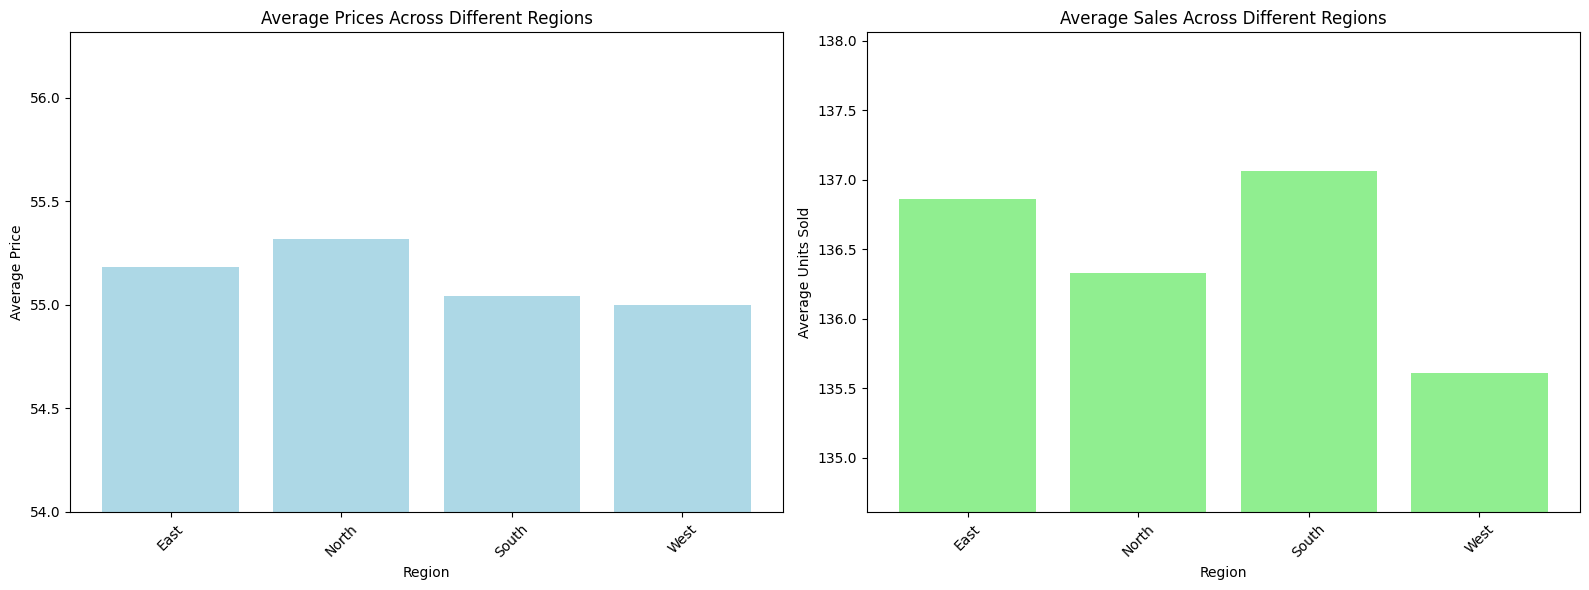

In [51]:
# Finding the range of the data for better axis limits
min_price, max_price = regional_prices['Price'].min(), regional_prices['Price'].max()
min_sales, max_sales = regional_sales['Units Sold'].min(), regional_sales['Units Sold'].max()

# Plotting
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot for regional prices
ax1[0].bar(regional_prices['Region'], regional_prices['Price'], color='lightblue')
ax1[0].set_xlabel('Region')
ax1[0].set_ylabel('Average Price')
ax1[0].set_title('Average Prices Across Different Regions')
ax1[0].tick_params(axis='x', rotation=45)
ax1[0].set_ylim(min_price - 1, max_price + 1)  # Adjust y-axis limits

# Plot for regional sales
ax1[1].bar(regional_sales['Region'], regional_sales['Units Sold'], color='lightgreen')
ax1[1].set_xlabel('Region')
ax1[1].set_ylabel('Average Units Sold')
ax1[1].set_title('Average Sales Across Different Regions')
ax1[1].tick_params(axis='x', rotation=45)
ax1[1].set_ylim(min_sales - 1, max_sales + 1)  # Adjust y-axis limits

plt.tight_layout()
plt.show()


> Average sales in South and East are slightly higher than North and much higher than the West.  
> Average Prices are almost identical in different regions, but the prices are higher in North.

##### How do inventory levels correlate with pricing and sales?
(Helps in understanding how inventory constraints affect pricing decisions.)

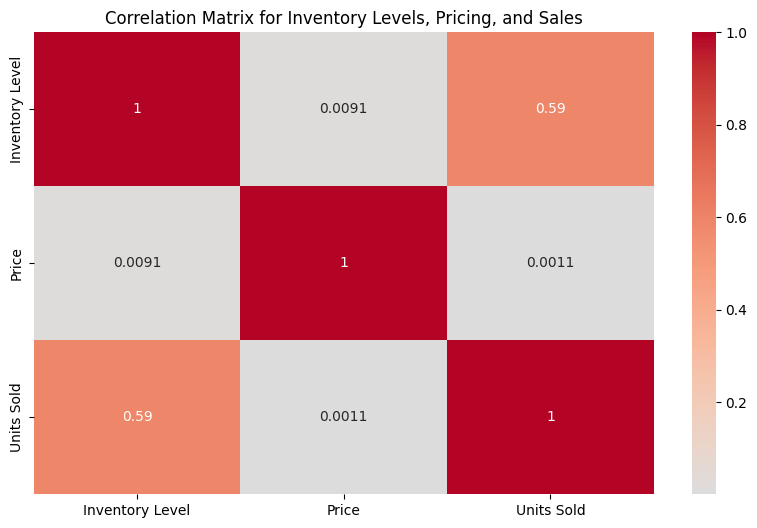

In [53]:
# Select the relevant columns for correlation
corr_data = dataset[['Inventory Level', 'Price', 'Units Sold']]

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Inventory Levels, Pricing, and Sales')
plt.show()

> Units Sold and Price has positive correlations with Inventory Level, but Inventory Level has a stronger correlation with it then Price.

##### What is the impact of discounts on sales?
(Determines the effectiveness of discounting as a pricing strategy.)

In [56]:
dataset['Discount'].nunique()

5

In [58]:
# Group by 'Discount' and calculate the average units sold
discount_impact = dataset.groupby('Discount')['Units Sold'].mean().reset_index()

In [61]:
discount_impact.head()

,Discount,Units Sold
0,0,135.694585
1,5,136.567405
2,10,136.769851
3,15,136.655293
4,20,136.640775


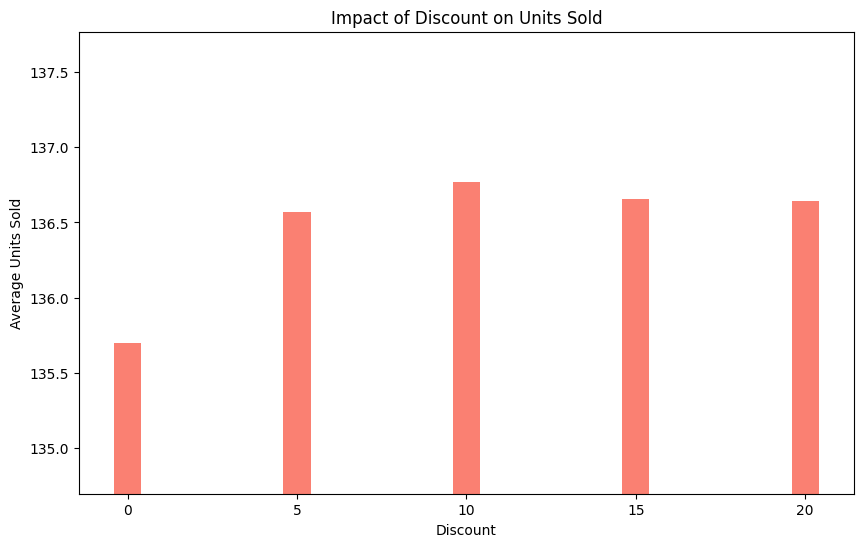

In [64]:
# Finding the range of the data for better axis limits
min_avg_unit_sold, max_avg_unit_sold = discount_impact['Units Sold'].min(), discount_impact['Units Sold'].max()

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes
ax.bar(discount_impact['Discount'], discount_impact['Units Sold'], color='salmon')
ax.set_xlabel('Discount')
ax.set_ylabel('Average Units Sold')
ax.set_title('Impact of Discount on Units Sold')
ax.set_xticks(discount_impact['Discount'])
ax.set_ylim(min_avg_unit_sold - 1, max_avg_unit_sold + 1)  # Adjust y-axis limits
plt.show()


> Zero Discount has the lowest impact on Units Sold!  
> The other Discount groups have almost the same (amount of) impact on the Units Sold!